In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from wrangle_mvp import get_zillow_mvp

df= get_zillow_mvp()

In [8]:
import seaborn as sns

In [2]:
df

,beds,baths,area,tax_value,date
0,4.0,3.5,3100.0,1023282.0,2017-01-01
1,2.0,1.0,1465.0,464000.0,2017-01-01
2,3.0,2.0,1243.0,564778.0,2017-01-01
3,4.0,3.0,2376.0,145143.0,2017-01-01
4,4.0,3.0,2962.0,773303.0,2017-01-01
...,...,...,...,...,...
52274,4.0,2.0,1633.0,346534.0,2017-09-19
52275,2.0,2.0,1286.0,354621.0,2017-09-20
52276,4.0,2.0,1612.0,67205.0,2017-09-21
52277,3.0,1.0,1032.0,49546.0,2017-09-21


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52279 entries, 0 to 52278
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   beds       52279 non-null  float64       
 1   baths      52279 non-null  float64       
 2   area       52279 non-null  float64       
 3   tax_value  52279 non-null  float64       
 4   date       52279 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(4)
memory usage: 2.0 MB


In [4]:
df.describe()

,beds,baths,area,tax_value
count,52279.000000,52279.000000,52279.000000,5.227900e+04
mean,3.309685,2.305237,1923.502841,5.281398e+05
std,0.934892,1.017821,1004.056909,7.483282e+05
min,1.000000,1.000000,152.000000,1.000000e+03
25%,3.000000,2.000000,1268.000000,1.939980e+05
50%,3.000000,2.000000,1659.000000,3.736120e+05
75%,4.000000,3.000000,2306.000000,6.186170e+05
max,14.000000,18.000000,21929.000000,4.906124e+07


In [226]:
(df == df)

beds         1.0
baths        1.0
area         1.0
tax_value    1.0
date         1.0
dtype: float64

In [23]:
def boxplots(df, excluding=''):
    
    cols = [col for col in df.columns if col not in [excluding]]

    plt.figure(figsize=(16, 20))
    for i, col in enumerate(cols):

        # i starts at 0, but plot nos should start at 1
        plot_number = i + 1 

        # Create subplot.
        plt.subplot(1, len(cols), plot_number)

        # Title with column name.
        plt.title(col)

        # Display boxplot for column.
        sns.boxplot(data=df[col])

        # Hide gridlines.
        plt.grid(False)

    plt.show()

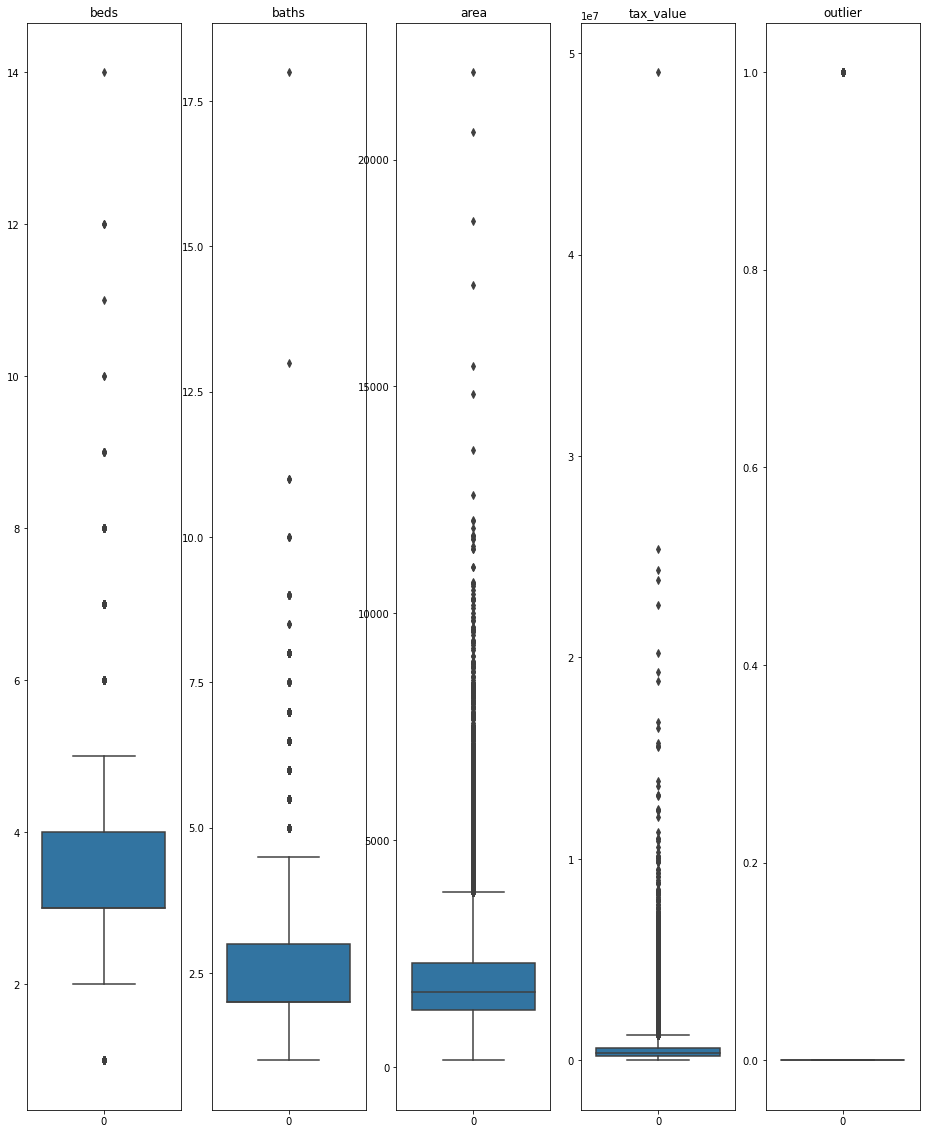

In [25]:
boxplots(df, 'date')

In [20]:
def remove_outliers(df, k, col_list):
    ''' 
    Removes outliers from a list of columns in a dataframe 
    and return that dataframe
    
    PARAMETERS:
    ------------
    
    df    :   DataFrame that you want outliers removed from
    
    k     :   The scaler of IQR you want to use for tromming outliers
                 k = 1.5 gives a 8σ total range
    '''
    # Create a column that will label our rows as containing an outlier value or not
    num_obs = df.shape[0]
    df['outlier'] = False
    for col in col_list:

        q1, q3 = df[col].quantile([.25, .75])  # get quartiles
        
        iqr = q3 - q1   # calculate interquartile range
        
        upper_bound = q3 + k * iqr   # get upper bound
        lower_bound = q1 - k * iqr   # get lower bound

        # update the outlier label any time that the value is outside of boundaries
        df['outlier'] = np.where(((df[col] < lower_bound) | (df[col] > upper_bound)) & (df.outlier == False), True, df.outlier)
    
    df = df[df.outlier == False]
    df = df.drop(columns=['outlier'])
    print(f"Number of observations removed: {num_obs - df.shape[0]}")
        
    return df

In [26]:
df = remove_outliers(df, 1.5, cols)

Number of observations removed: 5516


In [214]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46763 entries, 0 to 52278
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   beds       46763 non-null  float64       
 1   baths      46763 non-null  float64       
 2   area       46763 non-null  float64       
 3   tax_value  46763 non-null  float64       
 4   date       46763 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(4)
memory usage: 3.1 MB


In [216]:
df_rec = remove_outliers(df_all, 1.5, cols)
df_rec

Number of observations removed: 1645


,beds,baths,area,tax_value,date
0,4.0,3.5,3100.0,1023282.0,2017-01-01
1,2.0,1.0,1465.0,464000.0,2017-01-01
2,3.0,2.0,1243.0,564778.0,2017-01-01
3,4.0,3.0,2376.0,145143.0,2017-01-01
4,4.0,3.0,2962.0,773303.0,2017-01-01
...,...,...,...,...,...
52274,4.0,2.0,1633.0,346534.0,2017-09-19
52275,2.0,2.0,1286.0,354621.0,2017-09-20
52276,4.0,2.0,1612.0,67205.0,2017-09-21
52277,3.0,1.0,1032.0,49546.0,2017-09-21


In [217]:
remove_outliers(df_rec, 1.5, cols)

Number of observations removed: 10667


,beds,baths,area,tax_value,date
2,3.0,2.0,1243.0,564778.0,2017-01-01
3,4.0,3.0,2376.0,145143.0,2017-01-01
4,4.0,3.0,2962.0,773303.0,2017-01-01
6,4.0,3.0,3039.0,220583.0,2017-01-02
7,4.0,3.0,2540.0,430108.0,2017-01-02
...,...,...,...,...,...
52273,3.0,2.0,1570.0,72026.0,2017-09-19
52274,4.0,2.0,1633.0,346534.0,2017-09-19
52275,2.0,2.0,1286.0,354621.0,2017-09-20
52276,4.0,2.0,1612.0,67205.0,2017-09-21


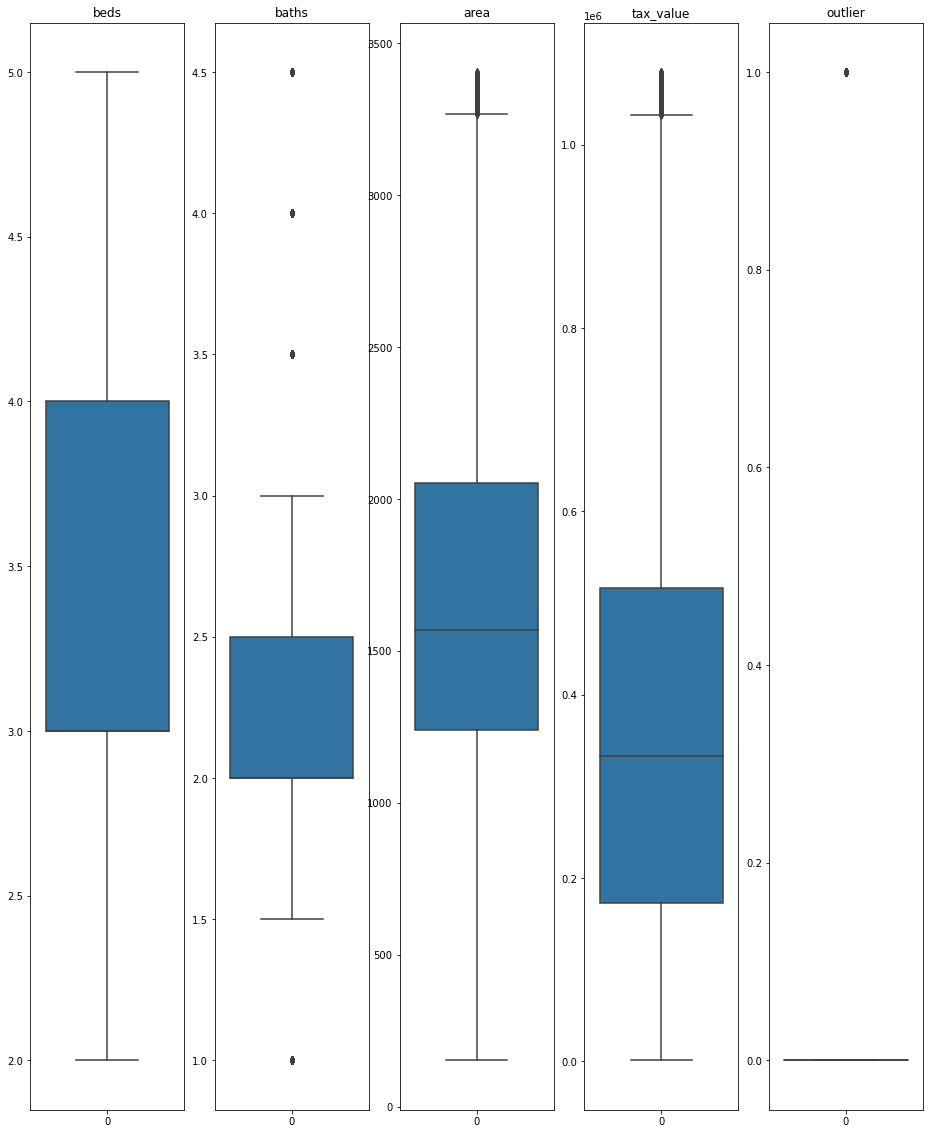

In [223]:
boxplots(df, 'date')

In [138]:
import math

In [196]:
def hr(n, suffix='', places=2, prefix='$'):
    '''Return a human friendly approximation of n, using SI prefixes'''
    prefixes = ['','K','M','B','T']
    
    if n <= 99_999:
        base, step, limit = 10, 4, 100
    else:
        base, step, limit = 10, 3, 100

    if n == 0:
        magnitude = 0 #cannot take log(0)
    else:
        magnitude = math.log(n, base)

    order = int(round(magnitude)) // step
    return '%s%.1f %s%s' % (prefix, float(n)/base**(order*step), \
    prefixes[order], suffix)

In [209]:
hr(191_10)

'$1.9 K'

In [210]:
def hists(df, exclude, granularity=5):    
    plt.figure(figsize=(16, 4))

    # List of columns
    cols = [col for col in df.columns if col not in [exclude]]

    for i, col in enumerate(cols):

        # i starts at 0, but plot nos should start at 1
        plot_number = i + 1 

        # Create subplot.
        plt.subplot(1, len(cols), plot_number)

        # Title with column name.
        plt.title(col)

        # Display histogram for column.
        df[col].hist(bins=granularity)

        # Hide gridlines.
        plt.grid(False)

        # turn off scientific notation
        plt.ticklabel_format(useOffset=False)

        # mitigate overlap
        plt.tight_layout()

    plt.suptitle(f'{hr(len(df),prefix="")} \
Houses in $ Range > {hr(df.tax_value.min())} - {hr(df.tax_value.max())} <',
                 y=1.05,
                 size=20
                )
    plt.show()

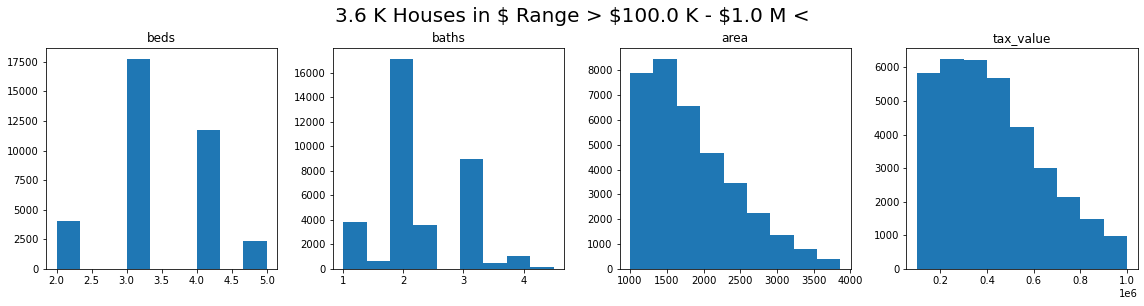

In [211]:
hists(df, 'date', granularity=9)

In [30]:
df.beds.value_counts(dropna=False)

3.0    22396
4.0    13598
2.0     8132
5.0     2637
Name: beds, dtype: int64

In [112]:
df_small = df[df.beds < 3.5]

In [113]:
df_large = df[df.beds > 3.5]

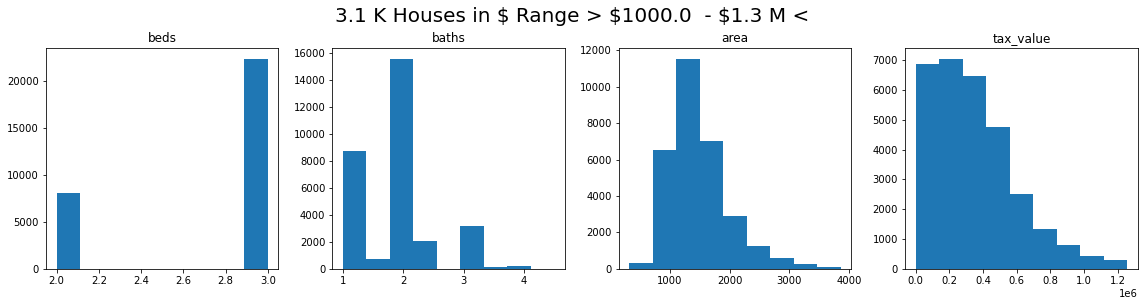

In [212]:
hists(df_small, 'date', 9)

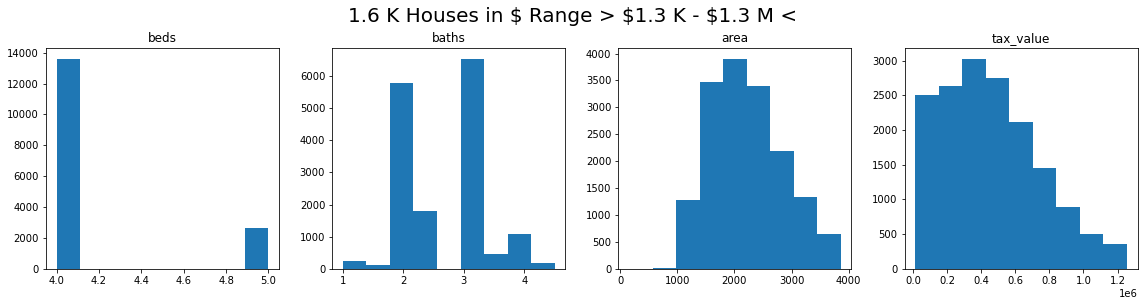

In [213]:
hists(df_large, 'date', 9)

In [43]:
df.describe()

,beds,baths,area,tax_value
count,46763.000000,46763.000000,46763.000000,4.676300e+04
mean,3.229669,2.135363,1738.338195,3.881914e+05
std,0.798444,0.757469,650.785064,2.631619e+05
min,2.000000,1.000000,152.000000,1.000000e+03
25%,3.000000,2.000000,1248.000000,1.785690e+05
50%,3.000000,2.000000,1593.000000,3.441430e+05
75%,4.000000,3.000000,2111.000000,5.390000e+05
max,5.000000,4.500000,3863.000000,1.255500e+06


In [44]:
df.tax_value.min()

1000.0

In [46]:
df[df.tax_value == df.tax_value.min()]

,beds,baths,area,tax_value,date
41861,3.0,4.0,3284.0,1000.0,2017-07-28


___
### So the cheapest house is a<font color='red'> 3_Bed, 4_Bath,  3,284 sqft</font>  Home...???!!!
___

In [47]:
df[df.tax_value < 10_000]

,beds,baths,area,tax_value,date
14691,2.0,1.0,589.0,3254.0,2017-03-30
41861,3.0,4.0,3284.0,1000.0,2017-07-28
49613,2.0,1.0,500.0,9242.0,2017-09-05


In [76]:
dirt_cheap_houses = df[df.tax_value < 35_000]
# cheap_houses

dirt_cheap_houses.describe().T

,count,mean,std,min,25%,50%,75%,max
beds,356.0,2.407303,0.586085,2.0,2.00,2.0,3.0,5.0
baths,356.0,1.120787,0.359210,1.0,1.00,1.0,1.0,4.0
area,356.0,1003.264045,297.966314,326.0,814.00,961.0,1137.0,3284.0
tax_value,356.0,27605.106742,5979.569217,1000.0,23970.25,29173.5,32257.0,34948.0


In [116]:
cheap_houses = df[df.tax_value < 50_000]
# cheap_houses

cheap_houses.describe().T

,count,mean,std,min,25%,50%,75%,max
beds,1334.0,2.612444,0.627354,2.0,2.00,3.0,3.0,5.0
baths,1334.0,1.252999,0.444912,1.0,1.00,1.0,1.5,4.0
area,1334.0,1098.068216,274.220845,326.0,930.75,1073.5,1227.5,3284.0
tax_value,1334.0,39270.739880,8522.750449,1000.0,34328.00,41163.0,46145.0,49967.0


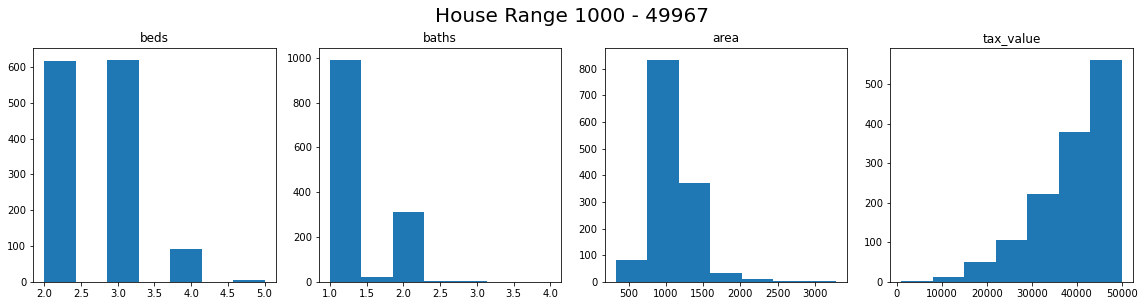

In [117]:
hists(cheap_houses, 'date')

In [118]:
under_hundy = df[df.tax_value < 100_000]
# cheap_houses

under_hundy.describe().T

,count,mean,std,min,25%,50%,75%,max
beds,6405.0,2.989539,0.718313,2.0,3.0,3.0,3.0,5.0
baths,6405.0,1.694301,0.563218,1.0,1.0,2.0,2.0,4.0
area,6405.0,1365.747229,365.914910,326.0,1109.0,1323.0,1578.0,3448.0
tax_value,6405.0,66580.571429,19015.008116,1000.0,52754.0,67462.0,81379.0,99995.0


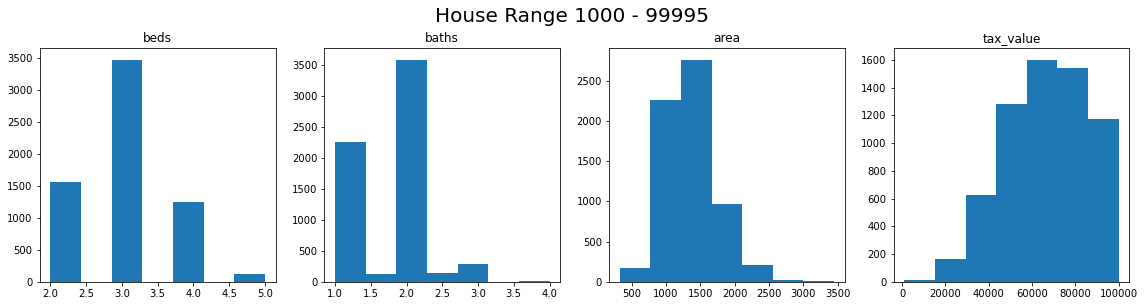

In [119]:
hists(under_hundy, 'date')

In [120]:
fifty_sixty_grand = df[(50_000 < df.tax_value) & (df.tax_value < 60_000)]
fifty_sixty_grand.describe().T

,count,mean,std,min,25%,50%,75%,max
beds,993.0,2.993958,0.670493,2.0,3.0,3.0,3.0,5.0
baths,993.0,1.607251,0.504843,1.0,1.0,2.0,2.0,4.0
area,993.0,1259.490433,255.450464,710.0,1103.0,1238.0,1392.0,2826.0
tax_value,993.0,54992.711984,2855.425364,50001.0,52547.0,54836.0,57519.0,59990.0


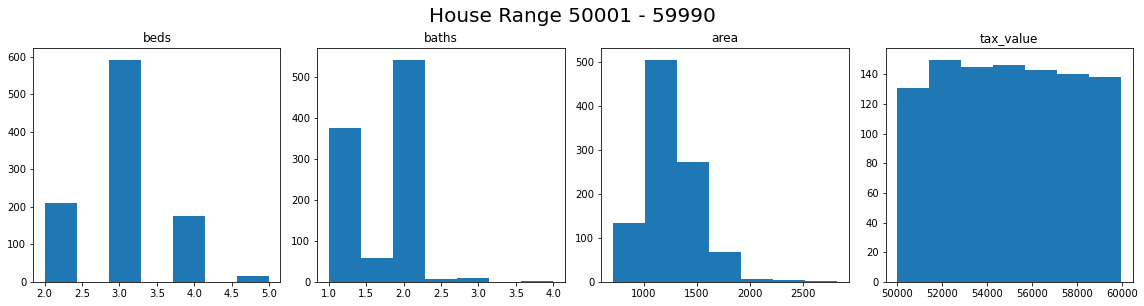

In [121]:
hists(fifty_sixty_grand, 'date')

In [122]:
small_or_under_fifty = df[(df.tax_value < 50_000) | (df.area < 1000)]
small_or_under_fifty.describe().T

,count,mean,std,min,25%,50%,75%,max
beds,4789.0,2.329296,0.520607,2.0,2.0,2.0,3.0,5.0
baths,4789.0,1.135519,0.345199,1.0,1.0,1.0,1.0,4.0
area,4789.0,930.404886,196.806438,152.0,819.0,912.0,982.0,3284.0
tax_value,4789.0,210628.963667,180658.198975,1000.0,48620.0,177859.0,309623.0,1250000.0


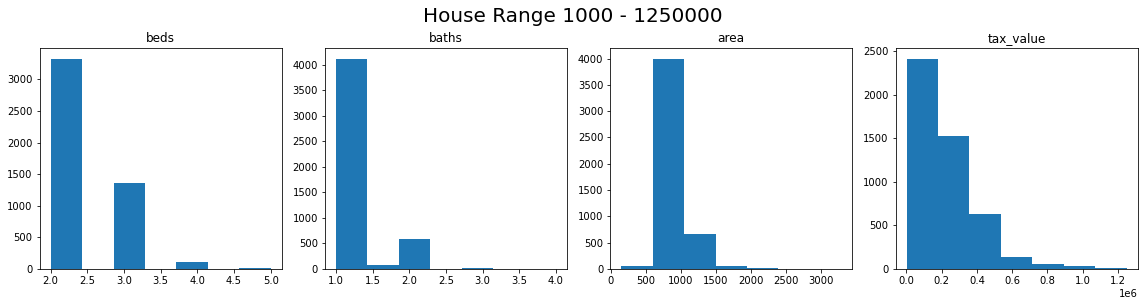

In [123]:
hists(small_or_under_fifty, 'date')

In [124]:
small_and_under_fifty = df[(df.tax_value < 50_000) & (df.area < 1000)].describe()
small_and_under_fifty.describe().T

,count,mean,std,min,25%,50%,75%,max
beds,8.0,59.581238,162.604574,0.426957,2.000000,2.000000,2.667208,462.0
baths,8.0,58.650459,162.978563,0.171208,1.000000,1.000000,1.274351,462.0
area,8.0,665.795217,323.463697,112.578185,428.000000,812.891775,882.750000,999.0
tax_value,8.0,25999.744772,19002.493653,462.000000,8189.715383,31969.502165,38659.000000,49864.0


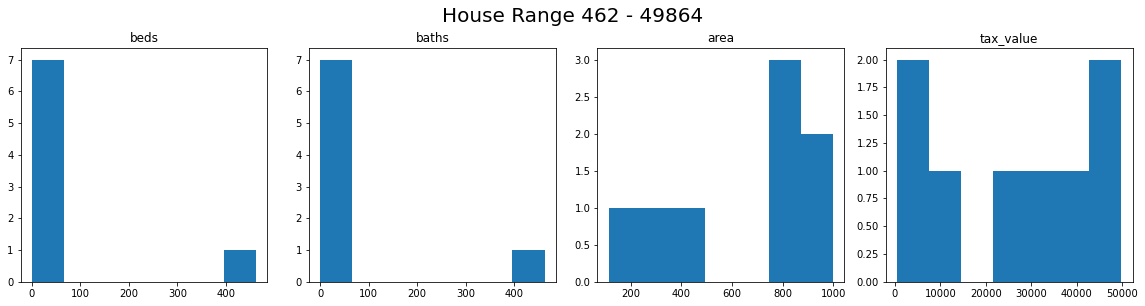

In [125]:
hists(small_and_under_fifty, 'date')

In [126]:
df[(df.area < 1000)].describe().T

,count,mean,std,min,25%,50%,75%,max
beds,3917.0,2.220322,0.425461,2.0,2.0,2.0,2.0,5.0
baths,3917.0,1.083355,0.274948,1.0,1.0,1.0,1.0,3.0
area,3917.0,863.500383,100.071618,152.0,804.0,880.0,945.0,999.0
tax_value,3917.0,248321.138626,179136.452006,3254.0,115692.0,224616.0,341197.0,1250000.0


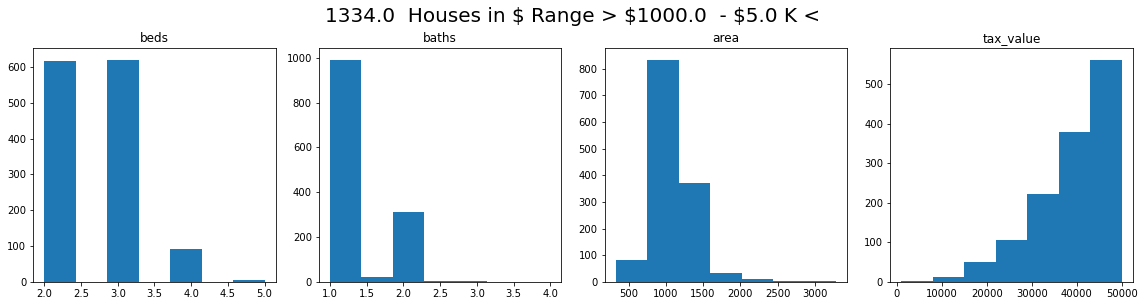


    σ = 1 beds         |     σ = 0 baths      |     σ = 274 sqft      |     σ = $0.9 K 
    


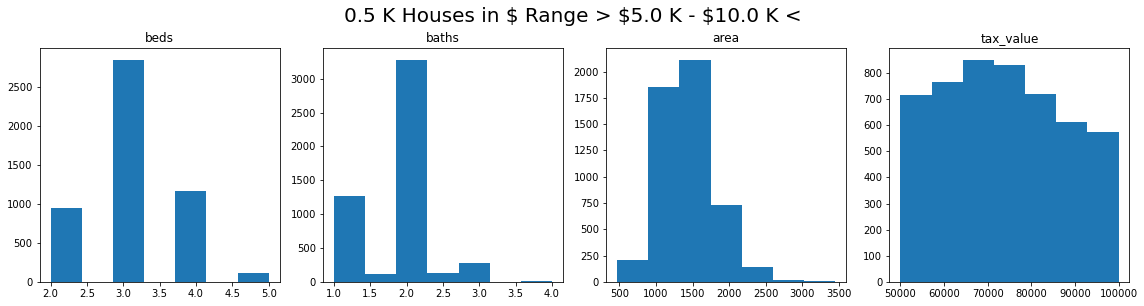


    σ = 1 beds         |     σ = 1 baths      |     σ = 354 sqft      |     σ = $1.4 K 
    


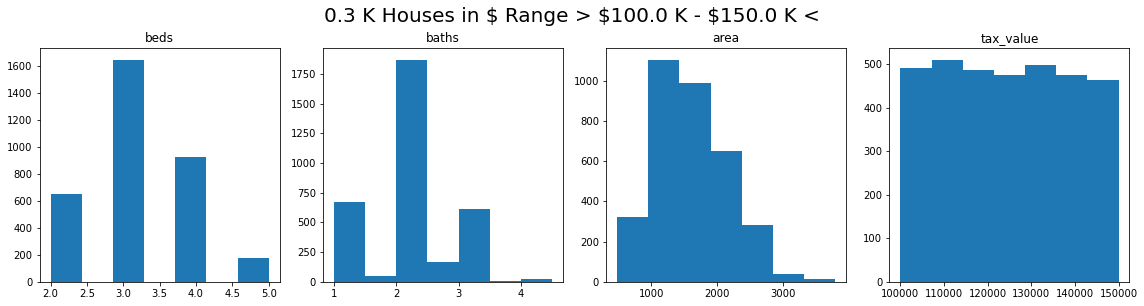


    σ = 1 beds         |     σ = 1 baths      |     σ = 540 sqft      |     σ = $1.4 K 
    


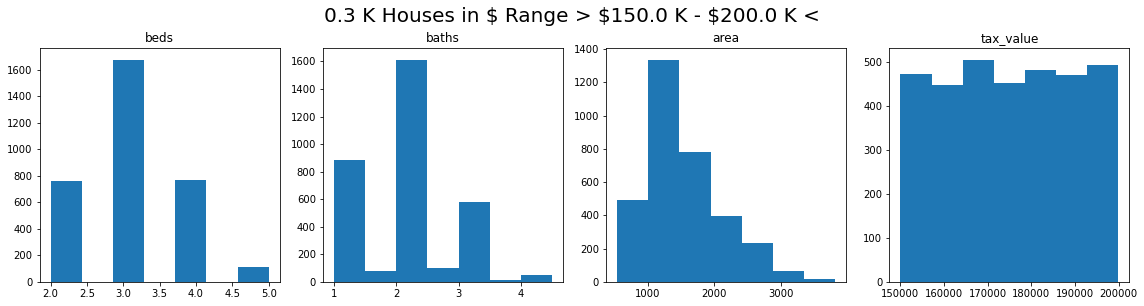


    σ = 1 beds         |     σ = 1 baths      |     σ = 559 sqft      |     σ = $1.4 K 
    


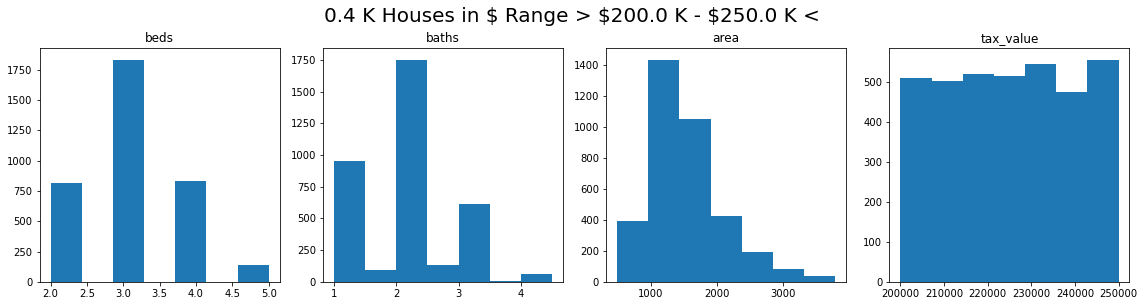


    σ = 1 beds         |     σ = 1 baths      |     σ = 554 sqft      |     σ = $1.4 K 
    


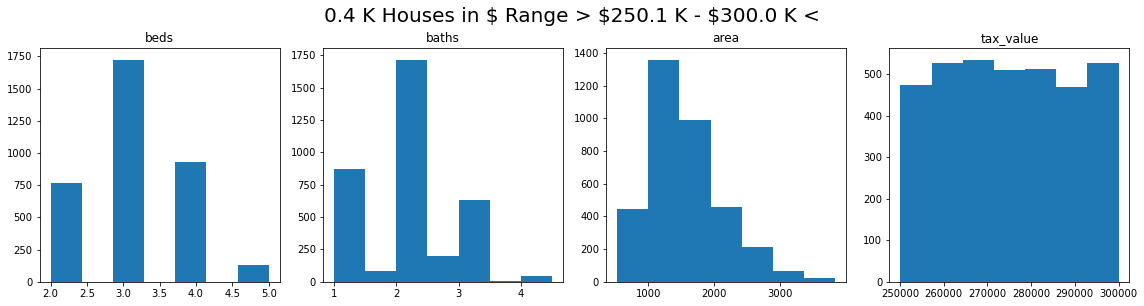


    σ = 1 beds         |     σ = 1 baths      |     σ = 548 sqft      |     σ = $1.4 K 
    


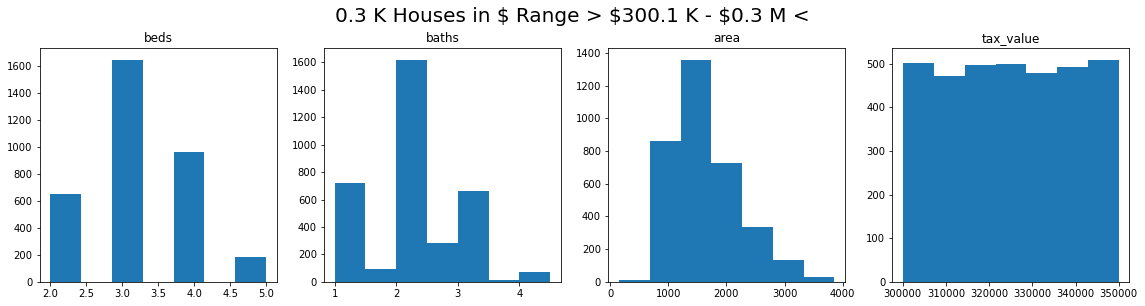


    σ = 1 beds         |     σ = 1 baths      |     σ = 579 sqft      |     σ = $1.4 K 
    


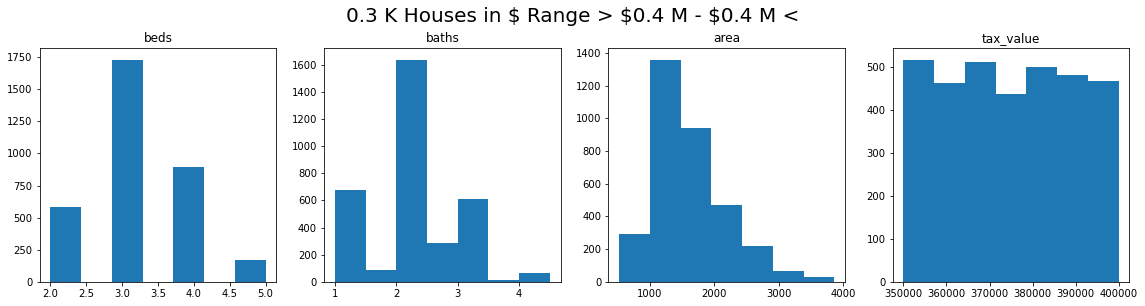


    σ = 1 beds         |     σ = 1 baths      |     σ = 552 sqft      |     σ = $1.4 K 
    


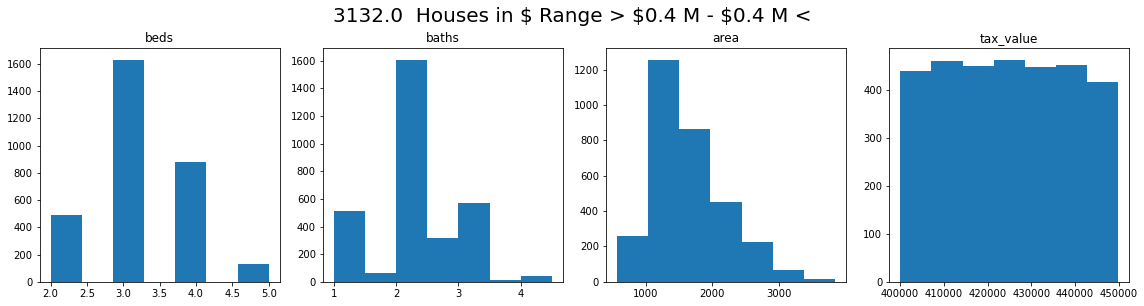


    σ = 1 beds         |     σ = 1 baths      |     σ = 533 sqft      |     σ = $1.4 K 
    


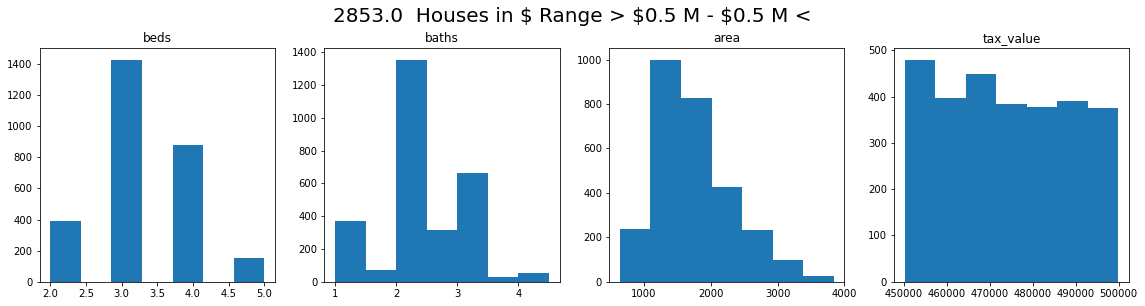


    σ = 1 beds         |     σ = 1 baths      |     σ = 572 sqft      |     σ = $1.5 K 
    


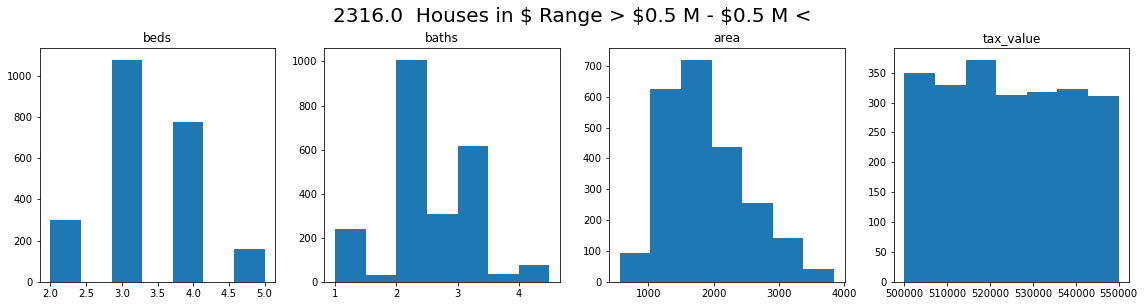


    σ = 1 beds         |     σ = 1 baths      |     σ = 614 sqft      |     σ = $1.4 K 
    


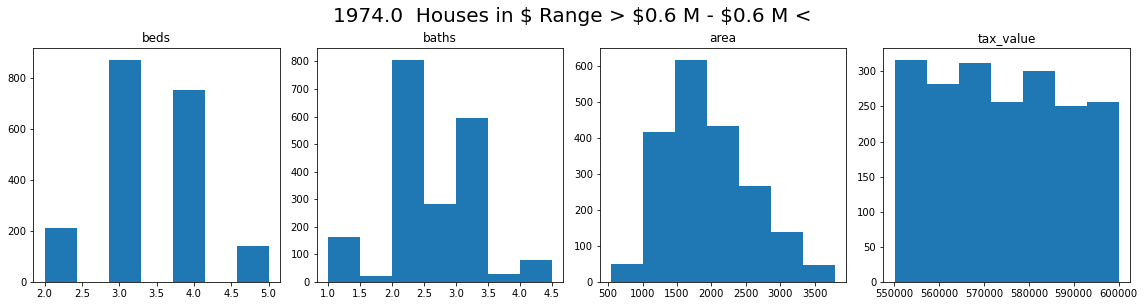


    σ = 1 beds         |     σ = 1 baths      |     σ = 610 sqft      |     σ = $1.4 K 
    


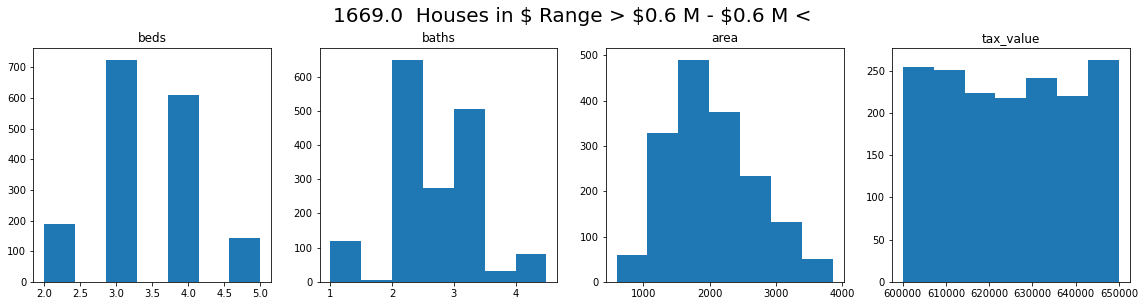


    σ = 1 beds         |     σ = 1 baths      |     σ = 640 sqft      |     σ = $1.5 K 
    


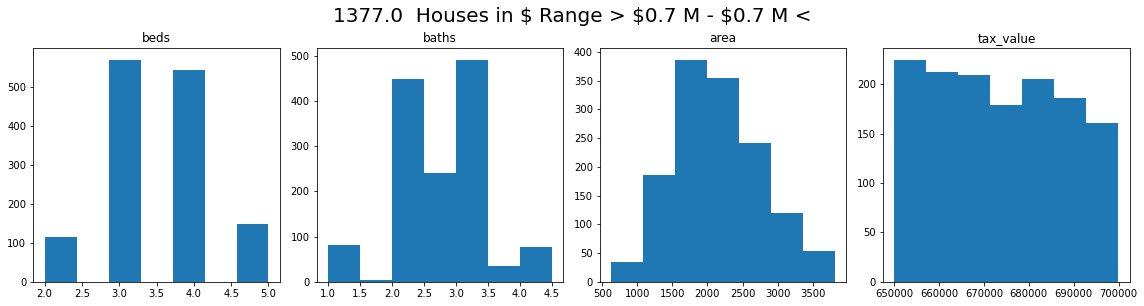


    σ = 1 beds         |     σ = 1 baths      |     σ = 622 sqft      |     σ = $1.4 K 
    


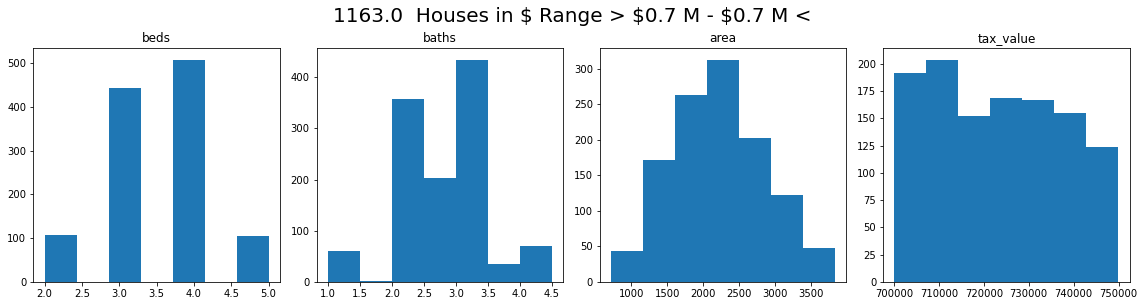


    σ = 1 beds         |     σ = 1 baths      |     σ = 633 sqft      |     σ = $1.4 K 
    


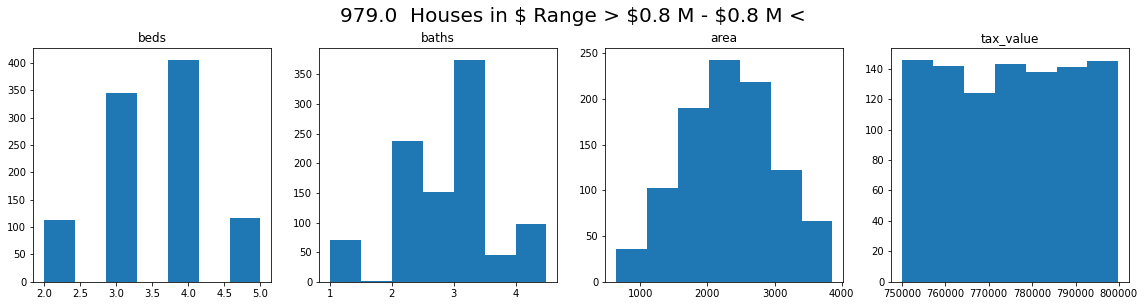


    σ = 1 beds         |     σ = 1 baths      |     σ = 689 sqft      |     σ = $1.5 K 
    


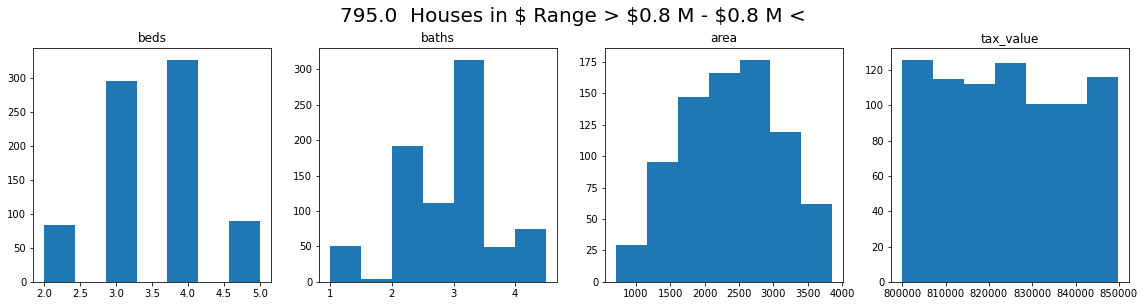


    σ = 1 beds         |     σ = 1 baths      |     σ = 697 sqft      |     σ = $1.5 K 
    


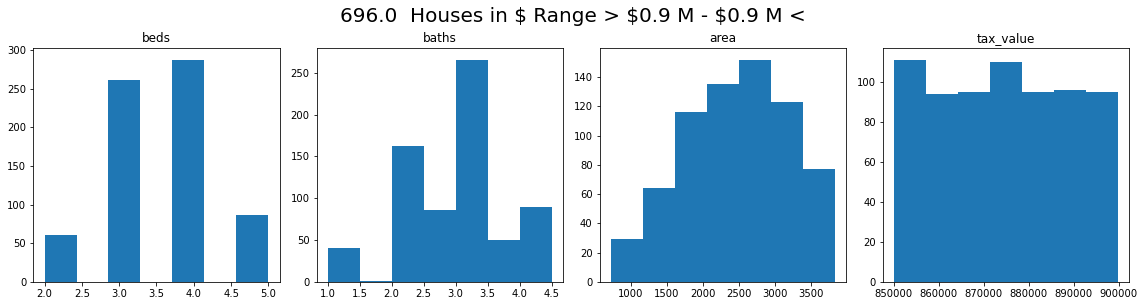


    σ = 1 beds         |     σ = 1 baths      |     σ = 719 sqft      |     σ = $1.4 K 
    


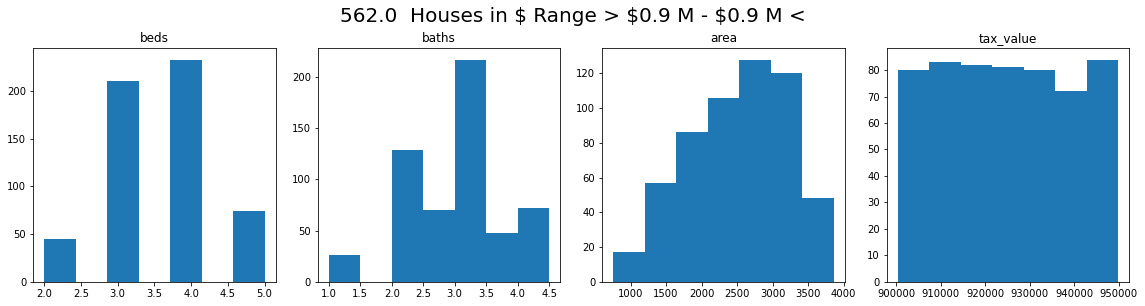


    σ = 1 beds         |     σ = 1 baths      |     σ = 702 sqft      |     σ = $1.4 K 
    


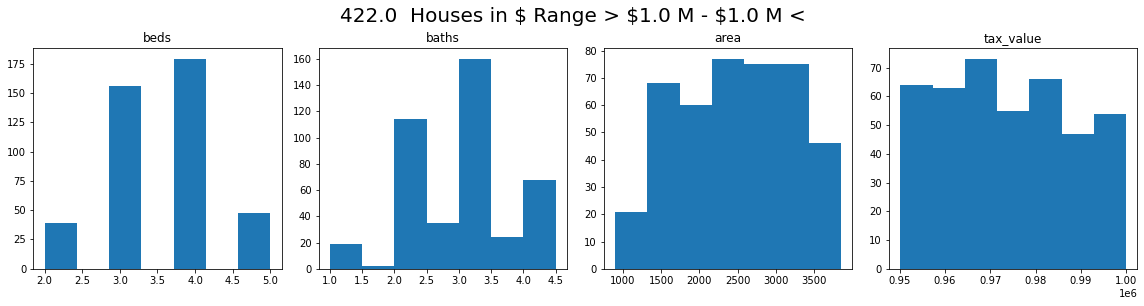


    σ = 1 beds         |     σ = 1 baths      |     σ = 733 sqft      |     σ = $1.4 K 
    


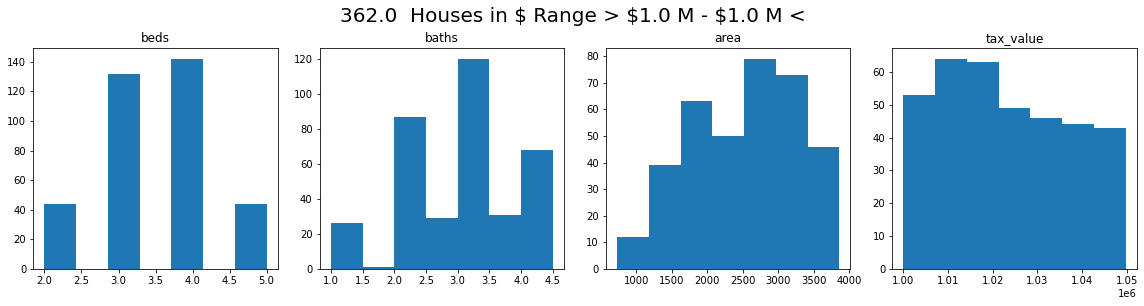


    σ = 1 beds         |     σ = 1 baths      |     σ = 757 sqft      |     σ = $1.4 K 
    


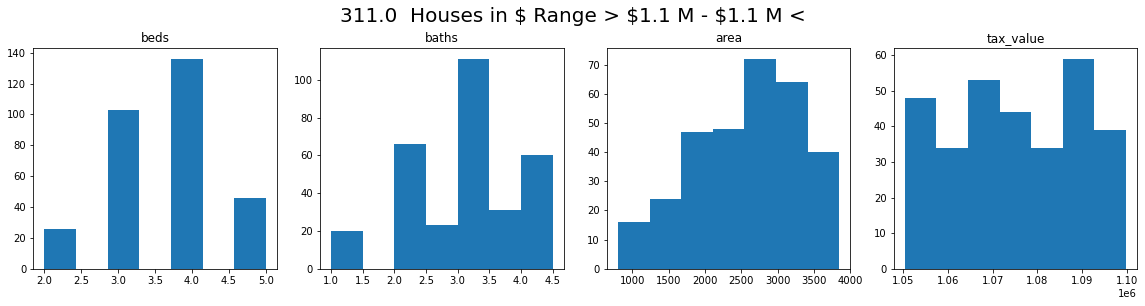


    σ = 1 beds         |     σ = 1 baths      |     σ = 729 sqft      |     σ = $1.4 K 
    


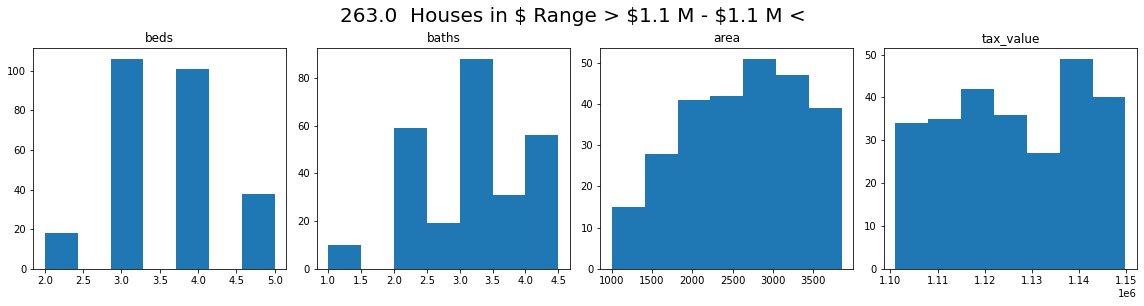


    σ = 1 beds         |     σ = 1 baths      |     σ = 723 sqft      |     σ = $1.4 K 
    


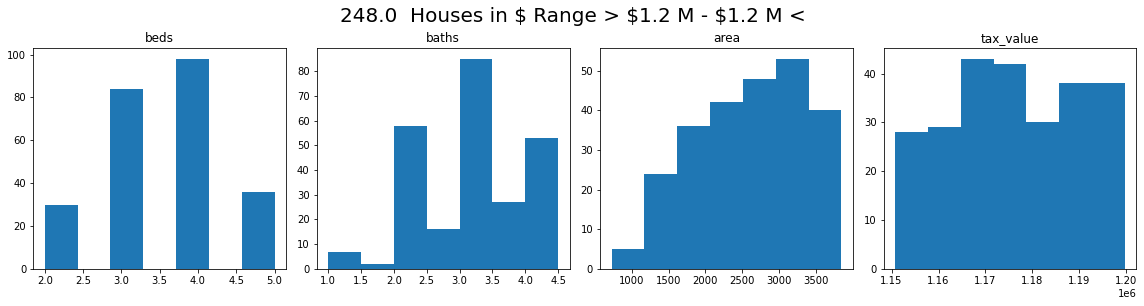


    σ = 1 beds         |     σ = 1 baths      |     σ = 738 sqft      |     σ = $1.4 K 
    


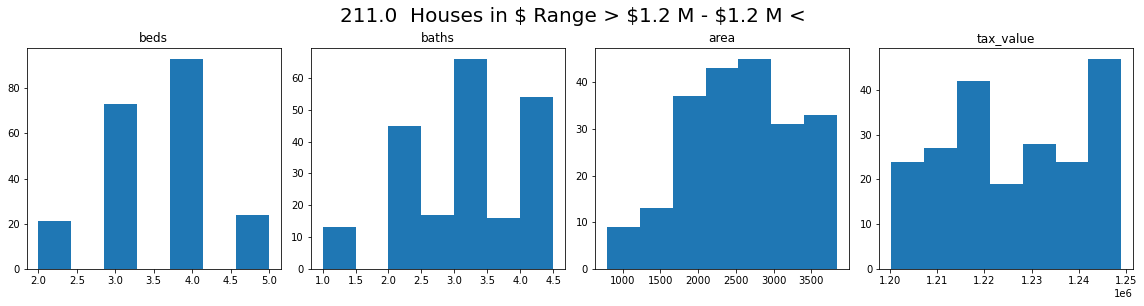


    σ = 1 beds         |     σ = 1 baths      |     σ = 712 sqft      |     σ = $1.4 K 
    


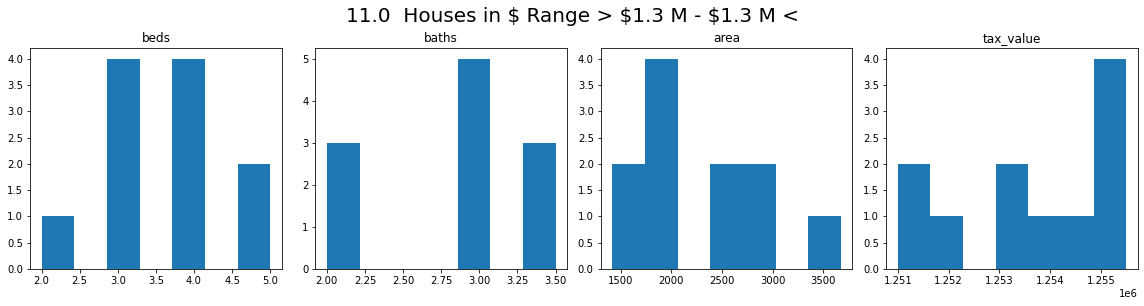


    σ = 1 beds         |     σ = 1 baths      |     σ = 670 sqft      |     σ = $1587.8  
    


ValueError: cannot convert float NaN to integer

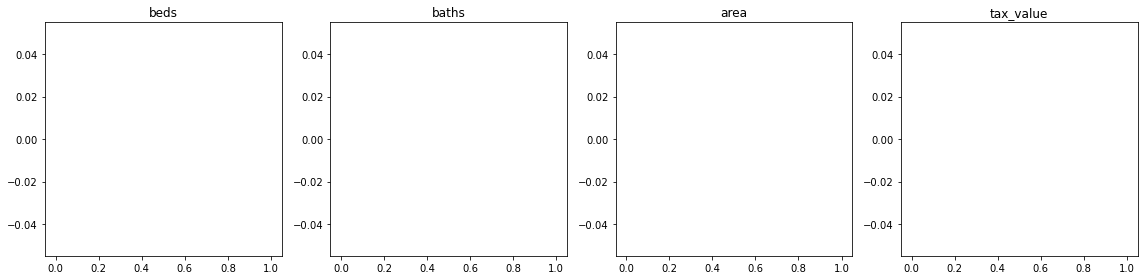

In [199]:
for i in range(0, 1_500_000, 50_000):
    price_range = 50_000
    houses = df[(i < df.tax_value) & (df.tax_value < i + price_range)]
    
#     print(f'The standard deviation of houses between:\n\
#     {i} and {i+price_range} is:\n ${round(houses.tax_value.std())}')
    
#     print(houses.tax_value.describe())
    
    hists(houses, 'date')
    
    print(f'''
    σ = {round(houses.beds.std())} beds         |     \
σ = {round(houses.baths.std())} baths      |     \
σ = {round(houses.area.std())} sqft      |     \
σ = {hr(houses.tax_value.std())} 
    ''')

In [92]:
round(df.tax_value.std()/1000)

263

In [204]:
# df_all = df

In [203]:
df[(df.tax_value <= 1_000_000) & (df.tax_value >= 100_000) & (df.area > 1000)]

,beds,baths,area,tax_value,date
1,2.0,1.0,1465.0,464000.0,2017-01-01
2,3.0,2.0,1243.0,564778.0,2017-01-01
3,4.0,3.0,2376.0,145143.0,2017-01-01
4,4.0,3.0,2962.0,773303.0,2017-01-01
6,4.0,3.0,3039.0,220583.0,2017-01-02
...,...,...,...,...,...
52269,3.0,2.0,1472.0,603333.0,2017-09-19
52272,4.0,3.0,2068.0,332251.0,2017-09-19
52274,4.0,2.0,1633.0,346534.0,2017-09-19
52275,2.0,2.0,1286.0,354621.0,2017-09-20


In [205]:
df = df[(df.tax_value <= 1_000_000) & (df.tax_value >= 100_000) & (df.area > 1000)]

In [207]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
beds,35848.0,3.345096,0.761441,2.0,3.0,3.0,4.0,5.0
baths,35848.0,2.272707,0.695973,1.0,2.0,2.0,3.0,4.5
area,35848.0,1846.539584,614.097346,1001.0,1361.0,1705.0,2220.0,3863.0
tax_value,35848.0,424259.866938,215823.765975,100002.0,249693.0,393502.0,564528.5,1000000.0


# Final Cell
<br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br>